<a href="https://colab.research.google.com/github/homeromolina/Analysis/blob/main/SHAPE_VALUE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 5.8 MB/s eta 0:00:00


In [1]:
import shap
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# California Housing Prices
dataset = fetch_california_housing(as_frame = True)
X = dataset['data']
y = dataset['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Prepares a default instance of the random forest regressor
model = RandomForestRegressor()

# Fits the model on the data
model.fit(X_train, y_train)

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


RandomForestRegressor()

In [2]:
# Fits the explainer
explainer = shap.Explainer(model.predict, X_test)

# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)

Exact explainer: 4129it [28:14,  2.43it/s]


In [6]:
from scipy.special import softmax

def print_feature_importances_shap_values(shap_values, features):
    '''
    Prints the feature importances based on SHAP values in an ordered way
    shap_values -> The SHAP values calculated from a shap.Explainer object
    features -> The name of the features, on the order presented to the explainer
    '''
    # Calculates the feature importance (mean absolute shap value) for each feature
    importances = []
    for i in range(shap_values.values.shape[1]):
        importances.append(np.mean(np.abs(shap_values.values[:, i])))
    # Calculates the normalized version
    importances_norm = softmax(importances)
    # Organize the importances and columns in a dictionary
    feature_importances = {fea: imp for imp, fea in zip(importances, features)}
    feature_importances_norm = {fea: imp for imp, fea in zip(importances_norm, features)}
    # Sorts the dictionary
    feature_importances = {k: v for k, v in sorted(feature_importances.items(), key=lambda item: item[1], reverse = True)}
    feature_importances_norm= {k: v for k, v in sorted(feature_importances_norm.items(), key=lambda item: item[1], reverse = True)}
    # Prints the feature importances
    for k, v in feature_importances.items():
        print(f"{k} -> {v:.4f} (softmax = {feature_importances_norm[k]:.4f})")

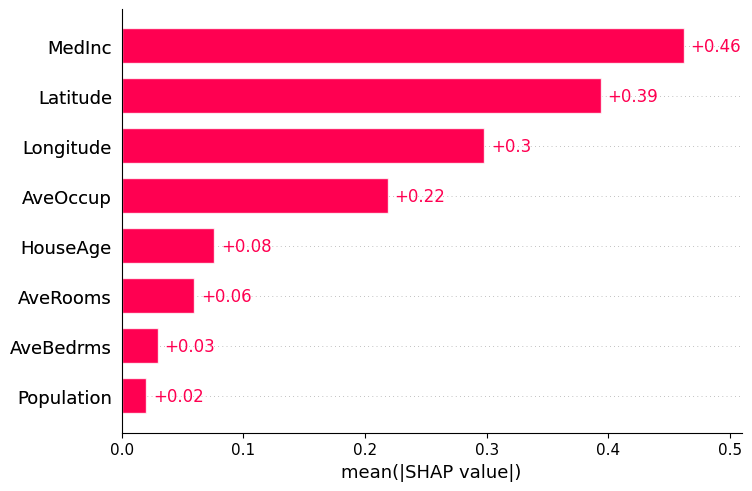

In [7]:
shap.plots.bar(shap_values)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


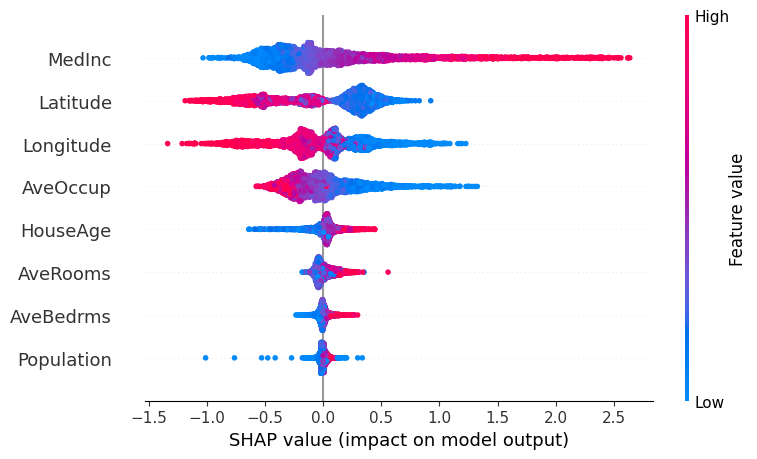

In [8]:
shap.summary_plot(shap_values)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


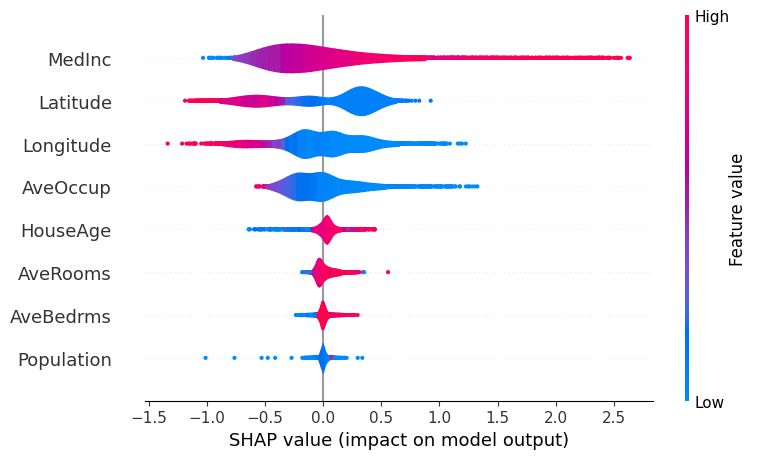

In [9]:
shap.summary_plot(shap_values, plot_type='violin')

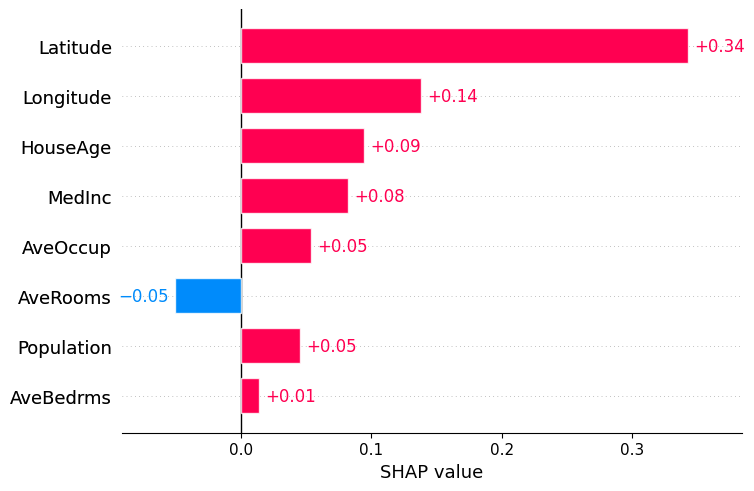

In [10]:
shap.plots.bar(shap_values[0])

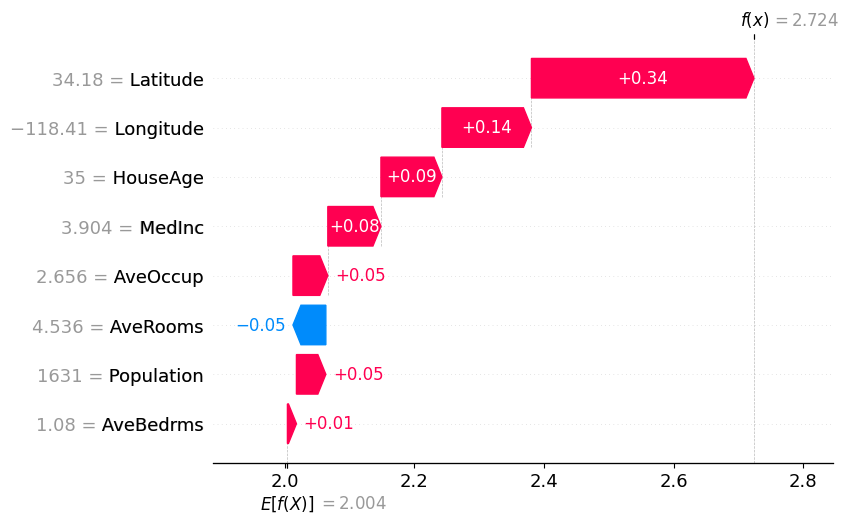

In [11]:
shap.plots.waterfall(shap_values[0])

In [14]:
shap.initjs()
shap.plots.force(shap_values[0])

**Interpretação dos Valores SHAP**:

- Valor Positivo: Se um valor SHAP é positivo, significa que o valor dessa característica contribui para aumentar a previsão da classe em questão.
- Valor Negativo: Se um valor SHAP é negativo, significa que o valor dessa característica contribui para diminuir a previsão da classe em questão.
- Valor Próximo de Zero: Se um valor SHAP está próximo de zero, significa que essa característica tem pouco ou nenhum impacto na previsão da classe em questão para essa instância específica.